In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

Macro `_latex_std_` created. To execute, type its name (without quotes).
=== Macro contents: ===
get_ipython().run_line_magic('run', 'Latex_macros.ipynb')
 

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

# Intro

In Classical ML, the paradigm was
- construct, by hand, transformations of the input to alternatate representations
    - feature engineering: create representations corresponding to a "concept" useful for classificatin
    - we called this a pipeline
- after multiple transformations, the representation was good enough that a classifer could separate classes

In "New" ML, the paradigm is very similar
- a sequence of transformations
    - each transformation is called a "layer"
        - "Deep Learning" is many layers of transformation
    - each layer successively constructs a new representation
    - the transformations are "discovered" (by gradient descent) rather than hand engineered
    
One way to think about transformations is as a sort of "pattern matching":
- does the input representation have a specific pattern (feature)
- we can search for multiple features
    - so new representation has "depth": one per feature
    

# Deep Learning

Inspired by Keras

- A neural network is a sequence of layers
- Each layer is a transformer of input
    - unike human transformation, the transformation is trained
- Final layer: classifier after input transformed into final form

Cartoon version of DL:
- successive layers to transform
- final classifier/regressor layer that can operate on transformed space

Types of layers (transformations) we will learn
- Fully Connected
- Convolutional
- Recurrent
- Lambda
    - occassionally you will have to write  your own operations
        - TensorFlow native operations: multiplication, addition
        
- Layer is a sequence of one or more
- Primitive layers (sequence of length 1, see above)
- Non-primitive layers
    - can treat a sequence of length greater than 1 as a single layer (treat the middle as a black box_

![Deep Learning cartoon](images/DL_Classifier.jpg)

## Generalized dot product as pattern matching

Given an input representation, how do we tell whether it matches a certain feature ?
- weights as pattern
- dot product computes score
    - score is high if input is similar to pattern
    
Although it is easiest to think of representations as one dimensional, that will rarely be the case
- images are a representation that is 2 or 3 dimensional (color channel)
- if a layer produces $n$ features, its output volume has a "depth" of $n$
    - so the 3d image (2d plus one channel for each of 3 colors), after passed through a layer creating $n$ features, now has depth $n$ rather than 3
    
So best to think of "dot product" as 
- element-wise multiplication of input representation with weights of same dimensionality
- reduce (sum) to scalar

**Aside** 
Different types of multiplication

$$
\begin{array}[lll]\\
\text{expression}                      & \text{Input shapes}        & \text{Output shape}  & \text{Description}\\
\W \x  & (m \times n), (n \times 1) & (m \times 1)  &  \text{Matrix multiplication: }\\
\x \cdot \y & n,n & 1 & \text{Dot product} \\
\W_a \otimes \W_b & (m \times n), (m \times n) & (m \times n) & \text{Hadamard product} \\
\end{array}
$$

## Where have we seen this before: logistic regression for MNIST
- input dimensions $28 \times 28 \times 1$
- $10$ new features, each produce a score
    - one per output class
    - each pattern is $28 \times 28 \times 1$
    - produces a score (does input match a specific digit)
- final "soft max" layer to convert score to probability

Imagine adding a two layer version
- layer 1: features
    - if we were to hand-engineer
        - horizontal top
        - horizontal botton
        - diagonal, each direction
- layer 2: combo of layer 1 features
    - horizontal top and diagonal
    
This might seem like the way to do digit recognition were we to perform feature engineerig by hand.

But our intuition of what features are useful may be off, or at least, sub-optimal

Deep Learning is an optimization problem that solves for the patterns (feature extractors) that prove
most useful for the final classification.

## How is this different ?

One key observation is that the "generalized dot product" is a linear transformation.

Feeding the output of linear transformation $T_1$ (implemented by matrix multiplcation by $M_1$) into linear trasnformation ($T_2$, implemented by matrix multiplication $M_2$)
is just equivalent to another linear transformation (multiplication by matrix resulting from $M_1  M_2$)

So there would be no mathematical purpose to more than a single layer of transformation.

Deep learning interposes a "non-linear" *activation* between linear layers.  In doing so,
the composition of layers is no longer linear.
As we will see, this will gives us the ability to compute arbitrary functions so the transformation
of representatins no longer needs to be linear.

The non-linearity is called an "activation" because it typically acts like a threshhold:
- if the linear "score" is high, pass it through
- otherwise reduce it to (near) 0

The activation introduces the ability to compute non-linear transformations as well as a mechanism to
separate High scores ("has feature") form insignificant scores.

In what follows, we will introduce
- several "linear" layers
- several "non-linearities" (activations)

A general NN will (usually) be an alternating sequence of linear layers and activations.

# The NN learning process
- construct a NN
- define a loss function
    - function of
        - training input, network output, label
- initialize weights (patterns)
- perform SGD
    - free variables: the weights
    - optimization objective: minimize loss, given weights
    - feed a training example through the NN (forward pass) computing an output
    - compute the loss on this example
    - compute the derivative of the loss wrt weights (backward pass)
    - update the weights in direction of loss reduction
    
Each of these steps will be a mini-topic.

# Constructing a NN: Layers

## Fully connected layer

## Activation layers

[cs 231n midterm review](http://cs231n.stanford.edu/slides/2018/cs231n_2018_midterm_review.pdf)

As we will see, there are several choices for the non-linear activation layer.
To get some intuition, let's show the plot of each, along with its derivative.
The derivative is important as it will come into play during back propagation.

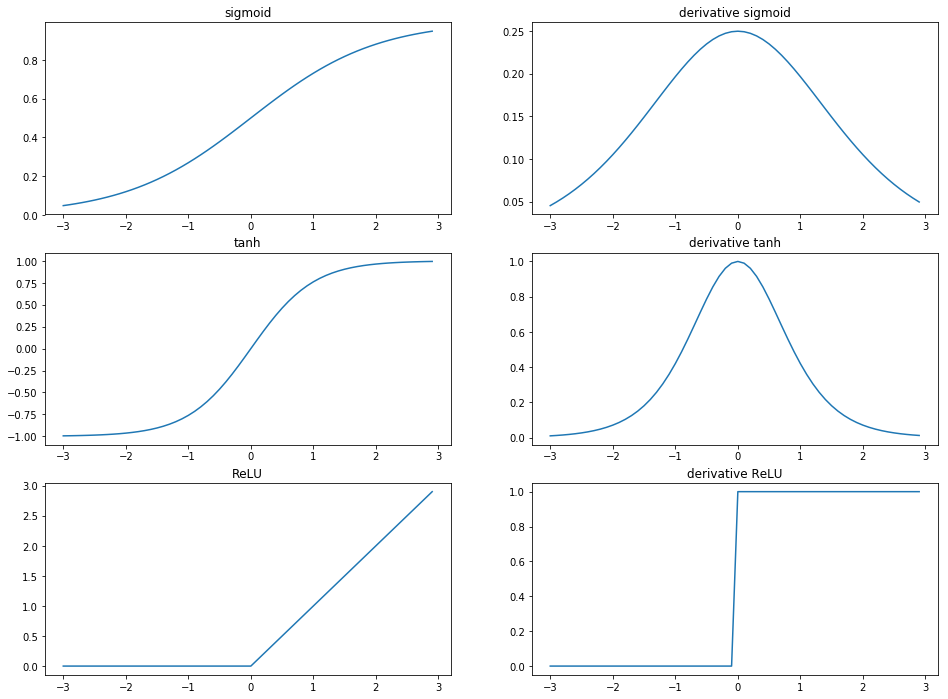

In [22]:
nnh.plot_activations( np.arange(-3,3, 0.1) )

The first thing to note is the different output ranges.
The choice of the activation may be influenced by the need for the output to fall into a particular
range (this is true only for activations that do not propagate further, such as the final layer).

- the range of tanh is $[-1,+1]$ which may be appropriate for $0$ centered outputs
- the range of sigmoid is $[0,1]$, which may be appropriate for
    - binary classifiers, or neurons that act as "gates" (on/off switches)
    - outputs that need to be in this range, such as probabilities

The other thing to notice are the derivatives (applicable to all layers, not just the final):
- both the tanh and sigmoid have large regions, at either tail, of near zero derivatives
    - a zero derivative can hamper learning via SGD
- the derivative of the sigmoid has a maximum value of about 0.25
    - as we will see, the magnitude of the derivative modulates the "error signal" during back propagation
        - so smaller values diminish the signal more than larger values
    
    

## Other activations

### Softmax Layer

### Leaky ReLU Layer

## The Loss "layer"

As usual with Machine Learning, we compute a Cost/Loss measure of how successful our model is,
and mininimize it during training.

Although not truly a "layer" in the sense that it is not deriving an alternative representation
of the input (it's more like a summary of the predictins and inputs) it be convenient
sometimes to refer to it as a layer.

In particular: when we perform SGD we will back propagate a derivative (with respective to weights)
of the loss through the layers of the NN.
So it will simplify notation if we consider the "loss" to be a "layer" (whose derivative with respect
to the loss is 1, as we will see).

# Universal function approximator
[Nelson book](https://neuralnetworksanddeeplearning.com/chap4.html)


A Neural Network is a Universal Function Approximator.

This means that a sufficiently wide (large number of neurons per layer) 
and deep (deeper means the network can be narrower) can approximate (to arbitrary degree)
the function represented by the training set.

Recall that the training set consists of a collection of pairs $(\x^\ip, \y^\ip), i \in [1,m]$.
This may look like a strange way to define a function but it is indeed a mapping from the
domain of $\x$ (i.e., $\mathcal{R}^n$) to the domain of $\y$ (i.e., $\mathcal{R}$, when $\mid \y \mid = 1$),
subject to $\y^i = \y^j \;  \text{if} \; \x^i = \x^j$).

We give an intuitive proof for a one-dimensional function (so all vectors $\x, \y, \W, \b$) are length 1.
For simplicity, let's assume that the training set
is presented in order of increasing value of $\x$, i.e.
$$
\x^{(0)} \lt \x^{(1)} \lt \ldots x^{(m)}
$$

Consider a single neuron with a ReLU activation, computing
$$
\max(0, \W \x + \b)
$$

Let's plot the output of this neuron, for varying $\W, \b$.
The slope of the neuron's activation is $\W$ and the intercept is $\b$.

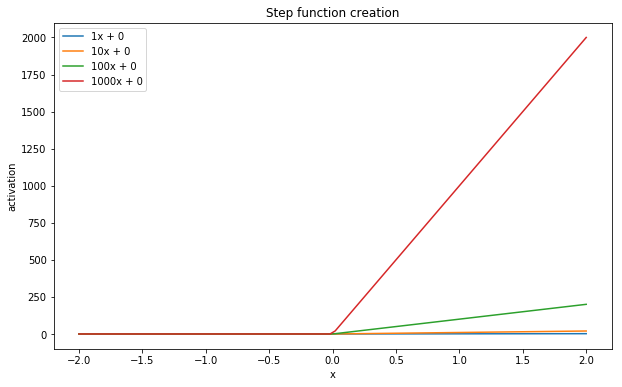

In [7]:
nnh.plot_steps( [NN(1,0), NN(10,0), NN(100,0), NN(1000,0), ])

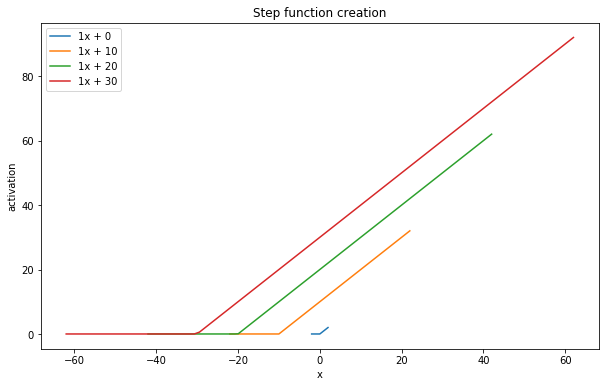

In [8]:
nnh.plot_steps( [NN(1,0), NN(1,10), NN(1,20), NN(1,30), ])

As you can see, with a little effort, we can construct a neuron whose slope is (almost) infinite,
rising from the x-axis at any offset.

With a little more effort (adding a neuron with an offsetting negative slope, at a very small distance from
the x-intercept) we can construct an approximation of a step function (unit height, 0 output at inputs
less than the x-interecept, and unit output for all inputs greater than the intercept).

(The sigmoid function is even more easily transformed into a step function).

So we can construct neurons implementing step functions at any x-intercept.
Construct $m$ such neurons, one for each $i \in [1,m]$ with x-intercept $\x^\ip$.
Let us call the $i^{th}$ such neuron "step neuron $i$".

If connect these $m$ step neurons to a "final" neuron with $0$ bias, linear activation, and weights

$$
\begin{array}[lll] \\
\W_1 & = & \y^{(1)} \\
\W_i & = & \y^{(i)} - \W_{i-1} \\
\end{array}
$$

we claim that the output of this neuron approximates the training set.

To see this: consider what happens when we input $\x^\ip$ to this network.
The only step neurons that are active (non-zero) are those corresponding
to inputs $1 \le j \le i$.
So the output of the final neuron is the sum of the outputs of the first $i$ step neurons.
By construction, this sum is equal to $\y^\ip$.

Thus, our neural network of step neurons and final "adder" neuron creates the mapping
defined by the training set.

**Financial analogy:** if we have call options with completely flexible strikes and same expiry,
we can mimic an arbitrary payoff in a similar manner.

# Loss functions

## Ideas
**Move out of NN** and into first 7 lectures ??
- Probably not
- discussed MSE, cross entropy in first part

**Explore this**
[Nielson book](https://neuralnetworksanddeeplearning.com/chap3.html)

Nielsen defines something "similar" to cross-entropy for mult-class

$$
\loss^\ip = \sum_j { \y^\ip \log( \hat{y}^\ip) + (1-\y^\ip) \log( 1- \hat{y} ) }
$$

rather than the true
$$
\loss^\ip = \sum_j { \y^\ip \log( \hat{y}^\ip)  }
$$
The two expressions are the same for binary (i.e., $j$ is two classes).
The latter 
- measures the distance between two distributions $\y^\ip$ and $\hat{\y}^\ip$.
- provided that $\y^\ip$ and $\hat{\y}^\i[$ are distributions (i.e., positve, sum to $1$)

The "similar to" can be viewed as the sum of binary cross-entropies (rather than mathematical cross-entropy)
and he finds it useful because he can apply it to the output of a group of binary neurons, even
if the group doesn't satisfy the probability assumptions (sum to $1$).

The "similar to", used as a cost function, is better than a quadratic (MSE) cost function when
outputs are activated by sigmoid
- derivative of sigmoid does *not* appear in derivative of "similar to", so doesn't diminish gradient
- derivative of sigmoid does appear in quadratic, so diminishes gradient and slows learning, at least from last layer

So Nielsen says either
- can use sigmoid activation followed by "similar to" cross entropy
- case use softmax followed by true cross entropy (log likelihood)
    - 
    
[Which loss function to use](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

- [cs 231n](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture3.pdf)

- [loss functions](https://rohanvarma.me/Loss-Functions/)
  
        

## Overview

The basis of the Machine Learning process is optimization of an objective function.
When maximizing, we call this objective function Utility; when minimizing we call it Cost or Loss.
When no confusion will arise, we will generically refer to the objective as Cost or Loss.

There are many loss functions to choose from, so how does one choose ?

First, let's state some basic properties of a loss/function:
- it should be positive
- it should be close to $0$ if the prediction is close to the correct value
- it should be differentiable (or at least sub-differentiable) if SGD is our optimizer

At the top level, the type of problem (classification or regression) comes into play.
A discrete measure (e.g., accuracy) is inappropriate for a continuous prediction (regression)
and a continuous measure may be inappropriate for discrete classification.

Sometimes the type of prediction (i.e., training example label) will help us to decide.
If our "prediction" is a probability distribution, then a loss function that compares
distributions would be appropriate.

Let's consider a binary classifier where the two classes  $\{-1,1\}$.
We'll define a linear "score" as a function of the input an decide on the output class based on the score.
In particular, if the score is positive we'll predict $1$; if it's negative we'll predict $0$

$
s(\x) = \w^T \x + \b 
$

$
\hat{y} = \begin{cases}
 -1 & \text{if } s(\x) < 0, \\
 1  & \text{if } s(\x) \geq 0
\end{cases}
$

Then, for any training example $\x^\ip$, $s(\x^\ip) *\y^\ip$ will
be positive if for correct predictions and negative for incorrect predictions.
So this product often appears as the "error" for functions used for classification loss.
For regression, the "error" is often of the form $(\y^\ip - s(\x^\ip) $

Let's visualize some common loss functions as a function of the error.

**TO DO**
Compare code with legend for final graph in [Varma](https://rohanvarma.me/Loss-Functions/)


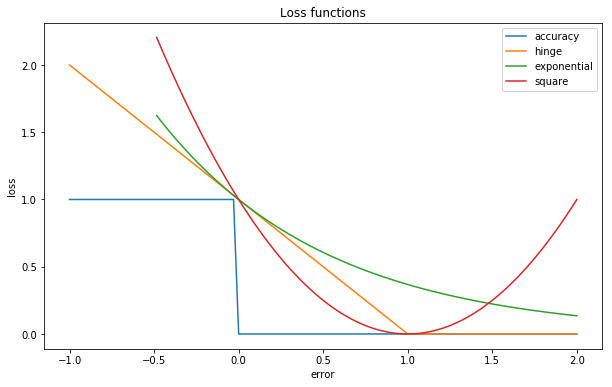

In [11]:
nnh.plot_loss_fns()

## Accuracy

Accuracy is a simple, binary measure: either the prediction is correct (0 loss) or incorrect (unit loss).
Thus it is used in classification problems.

Looking at the plot, you can see the accuracy is a step function and hence, is not differentiable
(nor sub-differentiable, since all tangents to the "kink" are above the line).
Thus, one cannot use accuracy (really: inaccuracy) as a loss measure in conjuction with SGD.

Despite it's drawbacks, it's worth examining properties that may be common to other loss functions
- there is no further gain (i.e., reduction in loss) once the score exceeds the threshhold
    - there is no force pushing the prediction to become "more confident" by increasing the score
- similarly, there is not further penalty(increase in loss) once the score fails to exceed the threshhold
    - this makes learning impossible as the derivative is 0
     
In summary, accuracy is used as a measure of quality of a predictive method but not as a loss function.
Typically, we use Cross Entropy as the loss function (Binary Cross Entropy sort of looks like accuracy).

During training, it is common to see a loss measure decrease even as accuracy remains unchanged.
The decrease in loss means we are "improving" incorrect predictions (i.e., getting closer to the threshhold for correct classification) while the unchanged accuracy means we have not yet corrected an incorrect prediction.

## Hinge/Margin loss

In classification, we need to convert a continuous score into a discrete class prediction, usually
comparing the score to a threshhold (which we can consider to be 0 just be shifting the scores).
This means that minor changes to the score can change predictions.
This can make predictions subject to noise in the input.

One idea is rather than using a threshhold, we create a margin: requiring the score to exceed
the threshhold by a margin for positive classification and to be at least the margin below the
threshhold for non-positive classification.

The loss on the $i^{th}$ training example is defined as
$$
\loss^\ip = \max(0, 1 - \y^\ip s(\x^\ip) )
$$

where $s(\x^\ip)$ is the computation of a "score" (just like logistic regression, typically a linear form).
Only if $\y^\ip, s(\x^\ip)$ have the same sign can the loss be less than $1$;
the loss can only be  $0$ if the absolute value of the score  is greater than $1$:

$$
\mid {s(\x^\ip)} \mid \;\ge 1
$$

That is, the loss is minimized when the score is greater than the margin of $1$.

The hinge loss for the training set is the sum of the hinge losses of each training example.


### Derivative

Like the ReLU, the Hingle Loss only has sub-gradients so
for linear score
$$
\hat{y}^\ip = s(\x^\ip) = \W \x^\ip
$$

the derivative of the loss is
$$
\frac{\loss}{\partial \W} = 
\begin{cases}
-\y^\ip \x & \text{if } \y^\ip  s(\x^\ip) < 1 \\
0 & \text{otherwise}
\end{cases}
$$

## Multi-class hinge loss

- [wikipedia](https://en.wikipedia.org/wiki/Hinge_loss)
- [cs231](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture3.pdf)
    - example, slides 7+

The hinge loss can be extended from two classes to many classes 
$C = \{ C_1 \ldots, C_{n_C} \}$

The loss on the $i^{th}$ training example is defined as
$$
\loss^\ip = \sum_{j \ne \y^\ip} \max \left(0, 1 - (\;  s_{\y^\ip}(\x) - s_j(\x)  \;)  \right)
$$

where $s_c$ is a score function specific to classs $c$:
$$
s_c(\x^\ip) = \W_c \x^\ip
$$

So the example loss is $0$ when the score for the correct class $\y^\ip$ is at least $1$ greater than
the score of any incorrect class.

(This is easily implemented by a matrix $\W$ of containing $\mid C \mid$ rows, one per class.

This creates a zone (of width two times the margin) in which it is possible for the score to be
on the "correct" side of the threshhold but no further than the margin away.  Predictions in
this zone are characterized as "incorrect" by the Hinge/Margin loss function.

One can see that once the score is farther than the margin from the threshhold, the derivative
of the hinge/margin loss is 0.  So this loss function tries to push different classes apart, but
"stops pushing" once the margin is crossed.
This contrasts with some other loss functions which continue to try to increase the score.

This type of loss may be used in either classification or regression problems.
When used for regression, the objective is somewhat inverted: rather than forcing the prediction
to be outside the zone, the prediction is characterized as correct only if it lies *within* the zone.

**TO DO**
- [Varma](https://rohanvarma.me/Loss-Functions/) says that Hinge loss, with L2 regularization,
leads to max-margin SVM.  Show this.
    - note: we have used a margin of $1$.  Why ?
        - it could be anything; the weight will scale 
        - but adding a regularizer (e.g., L2 regularizer for weights) normalizes and constrains
- [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html)
    - margin = y_true * prediction < 0 for mistake (and y_true in {-1,+1})
        - so sum of (1 - margin) is upper bound on number of mistakes
            - assume |prediction} > 1 ?
    - [Keras hinge loss classifier for circles problem](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/#attachment_6921)
- [wikipedia](https://en.wikipedia.org/wiki/Hinge_loss)

## Exponential loss

This is used in the AdaBoost (Adaptive Boosting) algorithm.
One can think of it as a smoothed version of either accuracy or hinge/margin loss.

Unlike hinge/margin loss, optimizing this loss function means there is pressure to increase
the score of an already correct prediction.  However, the derivative eventually decreases to near 0.
Moreover, note the asymmetry: there is greater pressure to correct an incorrect prediction than to
increase the score of a correct prediction.

This measure can be used for either classification or regression.  When used for regression, its
asymmetry implies a greater penalty for losses on one side of correct than the other.

## Squared error

We have seen variants of this before (MSE) for regression.
In theory one can use this for classification as well but observe that there is a penalty (i.e., increased
loss) for moving too far from the boundary.  So being "very confident" (higher score) is worse than
being "just confident enough".

- can relate MSE to likelihood


## Log likelihood: justifying the Cost functions
[Deep Learning Book 5.5](https://www.deeplearningbook.org/contents/ml.html)

We have justified our models as minimizing over Cost functions.

The cost functions we gave were "intuitive"; we now justify this mathematically.

The training data $\{ x^\ip | i=1, \dots, m \}$
is a sample from an unknown distribution $\pdata(\x)$

When we create a model, we are creating an approximation $\pmodel(\x;\Theta)$, parameterized by $\Theta$, of $\pdata(\x)$.


Note that $\pdata(\x^\ip)$ is not parameterized by $\Theta$ since the actual data doesn't depend
on the model's parameters $\Theta$ in any way.

We can motivate the choice of $\Theta$ by the principle of Likelihood Maximization.

Given the training set, and the true distribution $\pdata(\x)$,
we can compute the likelihood (i.e, probability) of drawing the $m$ samples in the training set as

$$
\likeli_{\text{data}} = \prod_{i=1}^m { \pdata(\x^\ip) }
$$

Similarly, we can compute the same likelihood, using the probabilities from the model

$$
\likeli_{\text{model}} = \prod_{i=1}^m { \pmodel(\x^\ip; \Theta) }
$$

We can turn this product into a sum by taking the log of both sides

$$
\log(\likeli_{\text{model}}) = \sum_{i=1}^m { \log(\pmodel(\x^\ip; \Theta)) }
$$

This is called the Log Likelihood.

So how do we choose $\Theta$ ?

Let us choose $\Theta$ such that the choice
*maximizes* the likelihood of seeing the training set.

$$
\hat{\Theta} = \argmax{\Theta}{\sum_{i=1}^m { \log(\pmodel(\x^\ip; \Theta)) } }
$$

That is, a choice of $\Theta$ that results in a model which reproduces the training set with
highest probability is the "best" model in terms of explaining the training set.

Replacing the sum by the expectation (ignoring the $\frac{1}{m}$ of the average, as it does not change $\Theta$)
$$
\hat{\Theta} = \argmax{\Theta}{ \E_{\x \sim \pdata} ( \log(\pmodel(\x; \Theta)) ) }
$$

We can also explain the choice of $\Theta$ as minimizing the KL divergence between
$\pdata$ and $\pmodel$.


$\KL(\pdata || \pmodel)= \E_{\x \sim \pdata} { (\log(\pdata(\x)) - \log(\pmodel(\x; \Theta)) )}$


The divergence has a minimum at $0$, which occurs when $\pdata = \pmodel$.

Rewriting 
$$
\KL(\pdata || \pmodel)= \E_{\x \sim \pdata} { \log(\pdata(\x)) } - \E_{\x \sim \pdata} {\log(\pmodel(\x; \Theta)) }
$$

Since only $\log(\pmodel; \Theta)$ depends on $\Theta$,
minimizing the KL divergence between $\pdata$ and $\pmodel$ 
is achieved by maximizing $\E_{\x \sim \pdata} \log(\pmodel; \Theta) )$ which is the maximization of log likelihood.

So the maximum likelihood estimation of $\Theta$ is the one that makes $\pmodel$ closest to $\pdata$.

So maximizing likelihood is equivalent to making the model distribution match the empirical.


We now show (below) that our choice of cost functions
- MSE for Regression
- Binary Cross Entropy for (binary) Classification

can be justified in terms of
maximization of the log likelihood.


### Log Likelihood of Linear models with normal errors

Our Linear models are of the form

$$
\hat{\y}^\ip = \Theta^T \cdot \x^\ip + \epsilon
$$
where $\epsilon \in \mathcal{N}(0,\sigma)$.

The $\epsilon$ can be interpretted in either of two ways
- as an error in fitting
- the possible existence of two training examples $i, i'$ with 
    - $\x^\ip = \x^{(i')}$ but
    - $\y^\ip \ne \y^{(i')}$
    - this is often explained as error in measurement
    
So our prediction $\hat{\y}^\ip$ becomes a Normal random variable with
mean $\mu = \Theta^T \cdot \x^\ip$ and standard deviation $\sigma$.



Thus, the conditional probability of $\hat{\y}^\ip$ given $\x^\ip$ is

$$
\begin{array}[llll] \\
p(\hat{\y}^\ip | \x^\ip) & = & \frac{1}{\sigma \sqrt(2\pi)} \exp(- \frac{(\hat{\y}^\ip - \mu)^2}{2\sigma}) & \text{def. of Normal} \\
    & \propto &\exp(- \frac{(\hat{\y}^\ip - \Theta^T \cdot \x^\ip)^2}{2 \sigma}) & \text{def. of }\mu \\  
\end{array}
$$

The Likelihood of the training set, given this model of the conditional probability,
is just the product over the training set of $p(\hat{\y}^\ip | \x^\ip)$:
$$
\mathbb{L}_{\text{model}} = \prod_{i=1}^m {p(\hat{\y}^\ip | \x^\ip)}
$$
and the Log Likelihood is
$$
\begin{array}[llll] \\
\mathbb{l}_{\text{model}} & = & \log( \prod_{i=1}^m {p(\hat{\y}^\ip | \x^\ip)}) \\
& = &  \sum_{i=1}^m {\log( p(\hat{\y}^\ip | \x^\ip) )} \\
& = &  \sum_{i=1}^m { - \frac{(\hat{\y}^\ip - \Theta^T \cdot \x^\ip)^2}{2 \sigma}} \\
& = &   - \frac{1}{2 \sigma} \sum_{i=1}^m { {(\hat{\y}^\ip - \Theta^T \cdot \x^\ip)^2}}
\end{array}
$$

We can see that maximizing the Log Likelihood of a linear model with normal errors
can be achieved by minimizing the Squared Errors ${(\hat{\y}^\ip - \Theta^T \cdot \x^\ip)^2}$

### Log likelihood of Binary classifiction

For binary classification (where $\hat{y}^\ip \in \{0,1\}$)
we compute a score as a linear function of $\x$
$$
s(\x^\ip) = \Theta^T \cdot \x^\ip
$$

and we convert the linear score into a probability via the logistic function

$$ \hat{p}^\ip  = \sigma(s(\hat\x^\ip))$$

The prediction (i.e., probability that the correct answer is $1$) becomes
$$
p(\hat{y}^\ip  = 1 \, |\, \x^\ip) = \hat{p}^\ip
$$
so
$$
p(\hat{y}^\ip  = 0 \,|\, \x^\ip) = 1 - \hat{p}^\ip
$$

We can write
$$
p(\hat{y}^\ip | \x^\ip) = p(\hat{y}^\ip  = 1  | \x^\ip)^{\y^\ip} * p(\hat{y}^\ip  = 0 | \x^\ip)^{(1- \y^\ip)}
$$

(because $\hat{\y} \in \{0,1\}$, one term in the product  always has exponent $0$)

Again, the likelihood is the product (over $i$) of these terms and the log likelihood is
$$
\begin{array}[lll]\\
\mathcal{l} & = & \sum_{i=1}^m { \y^\ip \log(p(\hat{y}^\ip  = 1  | \x^\ip))  + (1-\y^\ip )\log(p(\hat{y}^\ip  = 0  | \x^\ip) )} \\
   & = & \sum_{i=1}^m { \y^\ip \log(p(\hat{y}^\ip  = 1  | \x^\ip))  + (1-y^\ip )\log( 1 - p(\hat{y}^\ip  = 1  | \x^\ip) )} \\
\end{array}
$$


You should recognize the (negative of) the Log Likelhood as the Binary cross entropy loss.

So maximizing the log likelihood minimizes the Binary Cross Entropy Loss.

## Complex loss functions: multiple objectives

### Regularization objectives

### Neural Style Transfer

![Neural Style Transfer](images/NeuralStyleTransfer.jpg)

# Weight initialization: first cut

Although this seemes trivial, good choices are critical for successful training.

We will discuss this more in depth in a subsequent lecture but, for now
- Many activation functions have "flat" regions with near-zero gradient, which inhibits learning when using GD.
    - avoid choosing initial weights (too big/small) that cause activations to lie in the domain giving rise to flat activation function range

# Optimizers: first cut

Again, several choices.
But let's start by reviewing Mini batch SGD

# Training

Training is the process of solving for the parameter values that minimize the Loss function.
We feed in a training set, and minimize the average loss across the training set.

This is the same as "fitting" a model like we did in Classical ML in the first half of the course.
In fact, the API (for Keras) is not that different than sklearn.

So our goal is to find the $\theta$

$$
\DeclareMathOperator*{\argmin}{arg\,min}
\theta = \argmin_{\theta}(\text{loss})
$$

## Training is Optimization

How do we solve the minimization problem:
$$\theta = \argmin_{\theta}(\text{loss})$$

- Via an optimizer
    - given a loss function, over free variables
    - find the value for the free variables that minimizes the loss
- Many optimizers available
    - Most based on Gradient Descent
    - We will later see how Gradient Descent optimizers
        - compute the gradients
        - incorporate learning rate, momentum, etc.
        
For now, we will just use vanilla Gradient Descent and take the details for granted.


# The training loop

** Refer to Raw TF code in Colab Notebook DNN_TensorFlow ??

## Pseudo code

Let
- `NN`represent the function computed by the neural net, i.e, a map $X \mapsto y$
    - In general,$X$ is a batch (number of examples is `batch_size`)
    - $X$ denotes the name of the formal parameters of the function `NN`
    - $\Theta$ are the weights (trainable parameters) of `NN`
- `loss_fn` the function that compares the predictions (for the batch) to the correct outputs
- the optimizer used in our illustration is SGD

>
`
initialize(Theta)
`

`\# Training loop to implement mini-batch SGD
`

`for epoch in range(n_epochs):`

    for X_batch, y_batch in next_batch(X_train, y_train, batch_size, shuffle=True):
        # Forward pass
        z = NN(X_batch)
        
        # Loss calculation
        loss = loss_fn(z, y_batch)
        
        # Backward pass
        grads = gradient(loss, X)
        
        # Update 
        Theta = Theta - grads * learning_rate
`

We can conceive of a replacing the training loop with a higher level API whereby the entire training loop is replaced
by an `sklearn`-like API:
>
    NN = create Neural Net model object

    NN.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, 
           validation_data=(X_valid, y_valid), shuffle=True)
`

# Summary so far
- Thus far, not too different from Classical ML
- Differences
    - In Classical ML, the loss function was implicit in the model
        - here, you define the loss function
        - this is the key part of DL
        - many "canned" loss functions available
            - but the cool stuff happens via Cool Loss Functions
    - As you will see
        - In Classical ML,
            - many transformations (aside from scaling/normalization) were done explicitly based on data exploration and knowledge of the problem domain
        - In DL
            - each layer implicitly performs a transformation
                - we don't specify the logic, how or why
                - the optimizer "finds" good transformations

# Deeper dive: inside the fully connected layer

Before there was a layer API, you had to build it by hand, in TF.

A lot of code that you will find still uses raw TF.

And, on occassion, you have to write some raw TF: either in a Lambda function (like your own layer) or
when the connections between layers are more complex than the Sequential Keras model
- e.g., a model that takes inputs from the outputs of two other models

So let's implement a FC layer in raw TF.

# The "Why's"

## Why multi layer ? Universal Function approximators
[NNDL](http://neuralnetworksanddeeplearning.com/chap4.html)

We will spend much more time on this is a subsequent lecture but, for now:

A network maps inputs to outputs, so can think of it as a computing a function
- we don't know what that function is
    - but can describe it's input/output pairs (training examples)
    
The NN architecture is powerful enough to approximate any function (up to some precision)
- so very powerful
- the function is learned through training
    - not interpretable usuallly
    
It can be shown that any function can be computed with a shallow but very wide (lots of neurons per layer)
NN.
Arranging the NN into multiple layers ("deep" rather than "wide") allows the function to be approximted
using narrower layers.
One intuition: think of this like "factoring" code.  The early layers implement sub-routines
that will be used repeatedly in subsequent layers (rather than repeating the code at each use, which
is what happens in a shallow NN).

## Why were they hard to train ? 

Again: explored in depth in a subsequent lecture.  For now:
- unfortunate choices of activation function
    - zero gradient inhibits learning
- unfortunate/difficult initialization
    - initializing weights so that activations saturate (with zero gradient) hurt learning
    - see *PNN* page 32
        - vanishing, exploding gradients
- computational limits
    - larger networks empirically easier to train than smaller ones
        - [The Lottery Ticket Hypothesis](https://arxiv.org/abs/1803.03635)
            - within a large network is a smaller, easily trained network
            - increasing network side increases the chance of large network containing a trainable subset
            - [summary](https://towardsdatascience.com/how-the-lottery-ticket-hypothesis-is-challenging-everything-we-knew-about-training-neural-networks-e56da4b0da27)
            

## Why do GPU's matter ?

[What makes TPU's fined tuned for Deep Learning](https://cloud.google.com/blog/products/ai-machine-learning/what-makes-tpus-fine-tuned-for-deep-learning)

A GPU (Graphics Processing Unit) is a piece of hardware specially designed to perform repeated
vector multiplications (a typical calculation in graphics processing).
It is not general purpose (like a CPU) but does what it does extremely quickly, and using many
more cores than a CPU (typically several thousand).

As matrix multiplication is a fundamental operation of Deep Learning, GPU's have the ability to greatly
speed up training (and inference).

Google has a further enhancement called a TPU (Tensor Processing Unit) to speed both training and inference.
It is even less general than a GPU, but is highly specialized to eliminate bottlenecks (e.g., memory access) in fundamental Deep Learning matrix multiplication.

Note that both GPU's and TPU's incur an overhead (a "set up" step is needed before calculation).
So a speedup is achieved only for sufficiently large matrices, or long "calculation pipelines" (multiplying 
different examples by the same weights).

Since deep learning involves multiplying large matrices (each example) by large matrices (the weights, which are the same for each example in a batch), both GPU's and TPU's offer the possibility of large speed ups.

- GPU's are **not** necessary
    - but they are a **lot** faster
    - life changing experience
        - 30x faster means your 10 minute run (that ended in a bug) now only takes 20 seconds
        - increases your ambition by faster iteration of experimental cycle

In [8]:
print("Done")

Done
